##**Predict the percentage of an student based on the no. of study hours**

In [1]:
##Importing important libraries---
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
##importing Dataset


#with url import
url =  "http://bit.ly/w-data"
df_data = pd.read_csv(url)

# with dataset upload
#df_data_1 = pd.read_csv("/content/task_1_data.csv") 

print("Data is successfully imported")
df_data.head(10)
#print()
#df_data_1

Data is successfully imported


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [3]:
##Now print the last 5 records...
df_data.tail()

,Hours,Scores
20,2.7,30
21,4.8,54
22,3.8,35
23,6.9,76
24,7.8,86


In [4]:
#here we use describe() method so that we can able to see percentiles,mean,std,max,count of the given dataset.
df_data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [5]:
#Let's print the full summary of the dataframe .
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


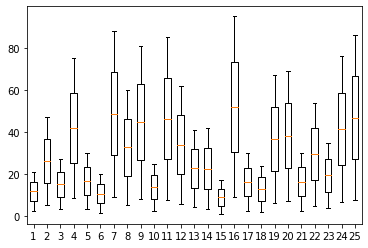

In [6]:
# plotting  boxplot using sea born
plt.boxplot(df_data)
plt.show()

## Visualizing Data.

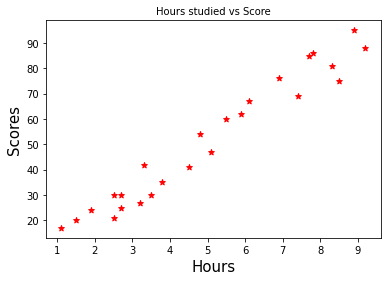

In [7]:
##ploting Scatter plot----
plt.xlabel('Hours',fontsize=15)
plt.ylabel('Scores',fontsize=15)
plt.title('Hours studied vs Score', fontsize=10)
plt.scatter(df_data.Hours,df_data.Scores,color='red',marker='*')
plt.show()

**This "SCATTER PLOT" above indicates positive linear relationship beteween hours **
**an individual studies may have a chance of scoring high marks**

In [8]:
# splitiing into X input and y as an output data 
X = df_data.iloc[:,:-1].values
y = df_data.iloc[:,1].values


In [9]:
print(X)

print()

print(y)

[[2.5]
 [5.1]
 [3.2]
 [8.5]
 [3.5]
 [1.5]
 [9.2]
 [5.5]
 [8.3]
 [2.7]
 [7.7]
 [5.9]
 [4.5]
 [3.3]
 [1.1]
 [8.9]
 [2.5]
 [1.9]
 [6.1]
 [7.4]
 [2.7]
 [4.8]
 [3.8]
 [6.9]
 [7.8]]

[21 47 27 75 30 20 88 60 81 25 85 62 41 42 17 95 30 24 67 69 30 54 35 76
 86]


##  Splitting data into train and test sets.

In [10]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state = 0,test_size=0.2)

In [11]:
## We have Splitted Our Data Using 80:20 RULe(PARETO)
print("X train.shape =", X_train.shape)
print("Y train.shape =", y_train.shape)
print("X test.shape  =", X_test.shape)
print("Y test.shape  =", y_test.shape)

X train.shape = (20, 1)
Y train.shape = (20,)
X test.shape  = (5, 1)
Y test.shape  = (5,)


## Training the Model.

In [12]:
from sklearn.linear_model import LinearRegression
lr_model = LinearRegression()

In [13]:
##Fitting Training Data
lr_model.fit(X_train,y_train)
print("Training algorithm is finished")

Training algorithm is finished


In [14]:
print("B0 intercept =",lr_model.intercept_,"\nB1 coeffiecients =",lr_model.coef_)## β0 is Intercept & Slope of the line is β1"

B0 intercept = 2.018160041434662 
B1 coeffiecients = [9.91065648]


In [15]:
##plotting the REGRESSION LINE---
y0 = lr_model.intercept_ + lr_model.coef_*X_train
y0

array([[39.67865467],
       [20.84840735],
       [79.32128059],
       [70.40168976],
       [12.91988217],
       [52.56250809],
       [78.33021494],
       [34.72332643],
       [84.27660883],
       [93.19619966],
       [62.47316457],
       [36.70545772],
       [28.77693254],
       [56.52677068],
       [28.77693254],
       [86.25874013],
       [26.79480124],
       [49.58931115],
       [90.22300272],
       [46.6161142 ]])

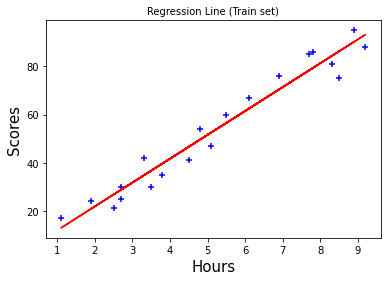

In [16]:
##plotting on train data
plt.scatter(X_train,y_train,color='blue',marker='+')
plt.plot(X_train,y0,color='red')
plt.xlabel("Hours",fontsize=15)
plt.ylabel("Scores",fontsize=15)
plt.title("Regression Line (Train set)",fontsize=10)
plt.show()

## Working on Test Data.

In [17]:
y_pred=lr_model.predict(X_test)   ##predicting the Scores for test data
print(y_pred)

[16.88414476 33.73226078 75.357018   26.79480124 60.49103328]


In [18]:
#now print the Y_test.
y_test

array([20, 27, 69, 30, 62])

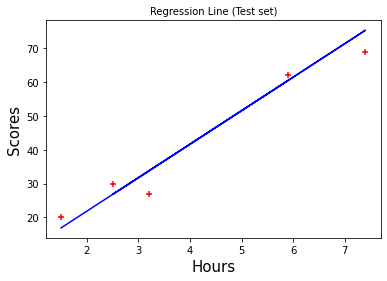

In [19]:
#plotting line on test data
plt.plot(X_test,y_pred,color='blue')
plt.scatter(X_test,y_test,color='red',marker='+')
plt.xlabel("Hours",fontsize=15)
plt.ylabel("Scores",fontsize=15)
plt.title("Regression Line (Test set)",fontsize=10)
plt.show()

## Comparing Actual vs Predicted Scores.

In [20]:
y_test1 = list(y_test)
prediction=list(y_pred)
df_compare = pd.DataFrame({ 'Actual':y_test1,'Result':prediction})
df_compare

,Actual,Result
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


## ACCURACY OF THE MODEL

In [21]:
from sklearn import metrics
metrics.r2_score(y_test,y_pred)   ##Goodness of fit Test

0.9454906892105354

### With the above analysis, we can say that we have got 94% percentage accuracy for the linear model that we have made which  indicates that above fitted Model is a working with best accuracy. 

## Following model can be taken ahead for production

## Predicting the Error Metrics

In [22]:
from sklearn.metrics import mean_squared_error,mean_absolute_error

In [23]:
MSE = metrics.mean_squared_error(y_test,y_pred)
root_E = np.sqrt(metrics.mean_squared_error(y_test,y_pred))
Abs_E = np.sqrt(metrics.mean_squared_error(y_test,y_pred))
print("Mean Squared Error      = ",MSE)
print("Root Mean Squared Error = ",root_E)
print("Mean Absolute Error     = ",Abs_E)

Mean Squared Error      =  21.598769307217456
Root Mean Squared Error =  4.647447612100373
Mean Absolute Error     =  4.647447612100373


## Predicting the score

In [24]:
Prediction_score = lr_model.predict([[8.20]])

print("predicted score (in marks) for a student studying 8.20 hours for exam will get :",Prediction_score)

predicted score (in marks) for a student studying 8.20 hours for exam will get : [83.28554318]


## CONCLUSION: 

### From the above result we can say that if a studied for 8.20 hrs then student will secured 93.28 Marks.